In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import csv file
dataset = pd.read_csv("iris.csv", delimiter = ',')
#features
X = dataset.iloc[:,:-1].values
#labels
y = dataset["species"].values
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Split data into train and test set

def split_data(X, y):
    #number of total observations
    total_obs = X.shape[0]
    test_size = (int) (total_obs*0.2) #30
    train_size = total_obs - test_size #120
    
    #generate random indices to be used to pick test set
    indices = [np.random.choice(total_obs, test_size, replace = False)]
    X_test = X[indices] #extract test set from total set
    y_test = y[indices]
    X_train = np.delete(X, indices, axis = 0)#remove test set from total set   
    y_train = np.delete(y, indices, axis = 0)
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y)

In [4]:
#Computes euclidean distance
def distance(observation, centroid):
    '''returns distance between observation and centroid'''
    return np.linalg.norm(observation - centroid)

In [5]:
#Plotting

def plot(centroids, observation_clusters, X_train):
    colours = ['g.', 'r.', 'c.', 'm.', 'y.', 'k.', 'w.']
    n = centroids.shape[0] #number of centroids
    for cluster_index in range(n):
        #returns observations that were assigned to cluster k
        if cluster_index in observation_clusters:
        #store indices of elements belonging to cluster k
            indices = np.where(observation_clusters == cluster_index)
            observations_belonging_to_cluster_k = X_train[indices]
            petal_lengths = observations_belonging_to_cluster_k[:,[2]].flatten()
            petal_widths = observations_belonging_to_cluster_k[:,[3]].flatten()
            x = centroids[cluster_index][2]
            y = centroids[cluster_index][3]
            plt.plot(petal_lengths, petal_widths, colours[cluster_index])
            #plot triangular shaped centroid
            plt.plot(x, y, 'k^')

    plt.xlabel('Petal length')
    plt.ylabel('Petal width')

    plt.show()
    

def plott(test_point, centroids):
    
    for i in range(centroids.shape[0]):
        
        x = centroids[i][2]
        y = centroids[i][3]
        plt.plot(x, y, 'k^')
        
    plt.plot(test_point[2], test_point[3], 'c.')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')

    plt.show()

In [6]:
def KMeans(X_train, k = 3, error = 0):
    '''Takes in dataset (features) in the form of a numpy array'''
    
    rows = k #number of centroids
    #total number of observations in training set
    total_obs = X_train.shape[0]
    
    #Randomly generate k indices
    indices = [np.random.choice(total_obs, k, replace = False)]
    #Extract observations based on indices
    centroids = np.array(X_train[indices])
    
    old_centroids = np.zeros((centroids.shape[0], centroids.shape[1]))
    #past_centroids = np.zeros((rows, cols))
    
    #hold each datapoints' cluster in the form of an integer between 0 and 2
    observation_clusters = np.zeros((total_obs, 1)).flatten()
    
    #Train until centroids stop changing
    while(centroids != old_centroids).any():
        
        old_centroids = centroids.copy()
        #np.concatenate(past_centroids, centroids)
        
        #runs through observations
        for observation_index, observation in enumerate(X_train):
            #array to store distance between current datapoint and clusters
            distances = np.zeros((k,1)).flatten()
            #run through all centroids for each given observation
            for centroid_index, centroid in enumerate(centroids):
                #distance between centroid and observation
                distances[centroid_index] = distance(observation, centroid)
            observation_clusters[observation_index] = np.argmin(distances)#returns index of smallest distance
        plot(centroids, observation_clusters, X_train)
        #Update centroids
        for cluster_index in range(k):
            #returns observations that were assigned to cluster k
            if cluster_index in observation_clusters:
                #indices of elements belonging to cluster k
                indices = np.where(observation_clusters == cluster_index)
                observations_belonging_to_cluster_k = X_train[indices]
            #calculate mean along the columns and update centroid at position = cluster_index
            centroids[cluster_index] = np.apply_along_axis(np.mean, axis = 0, arr = observations_belonging_to_cluster_k)
     
    return (centroids, observation_clusters)

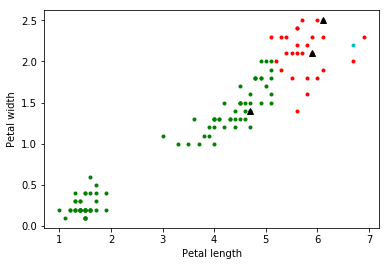

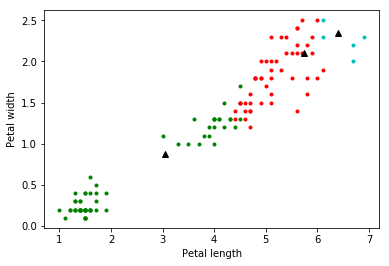

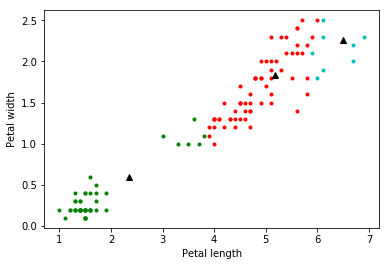

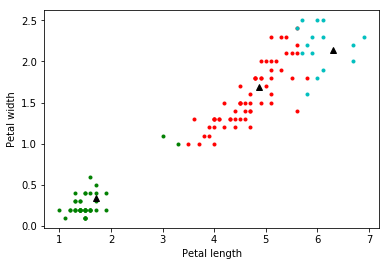

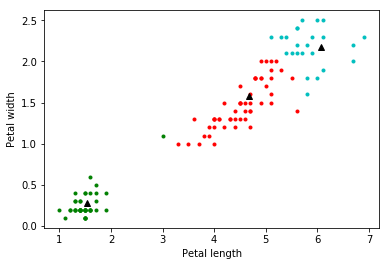

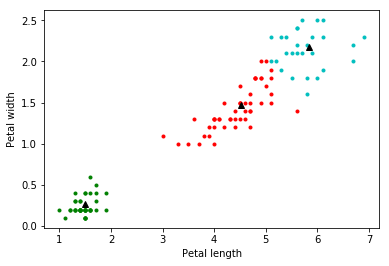

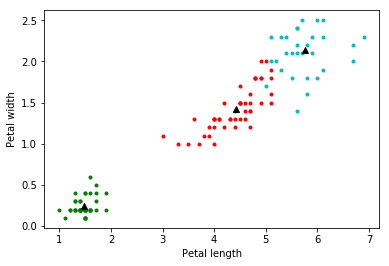

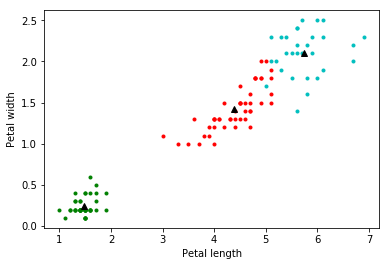

Centroids are placed randomly and updated to move to the centre of their respective clusters


In [7]:
#Train
centroids, observation_clusters = KMeans(X_train, k = 3)
print("Centroids are placed randomly and updated to move to the centre of their respective clusters")

In [8]:
print(centroids)
print(observation_clusters)

[[ 5.00930233  3.4255814   1.46744186  0.24418605]
 [ 5.91489362  2.76382979  4.3893617   1.4212766 ]
 [ 6.80666667  3.06333333  5.73333333  2.10333333]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  2.  1.  2.  2.  2.  2.
  2.  1.  2.  2.  2.  1.  2.  1.  2.  2.  1.  1.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  1.]


In [9]:
#Testing

def predict(X_test, centroids):
    
    for i in range(X_test.shape[0]):
        plott(X_test[i], centroids)
        
    
    

Test points are in blue and they are classified according to their nearest centroid


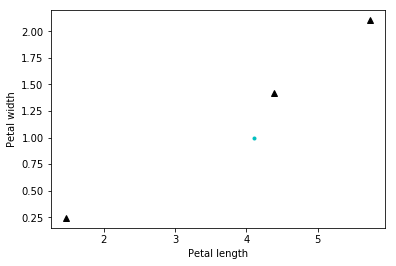

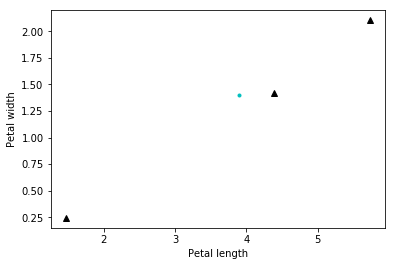

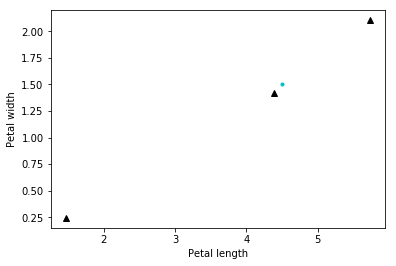

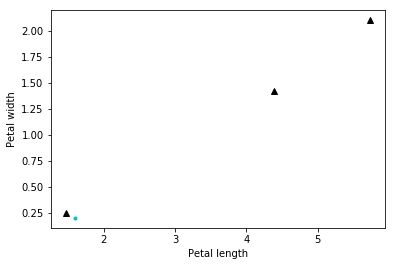

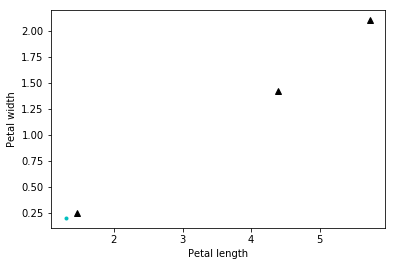

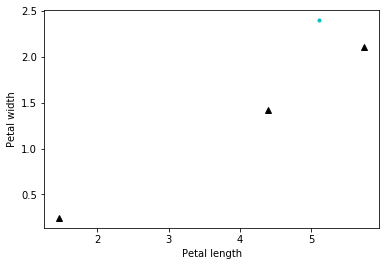

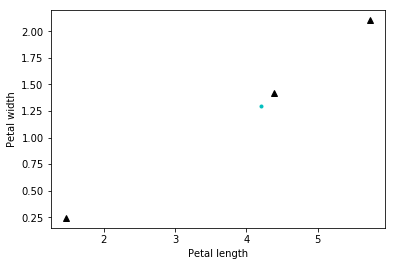

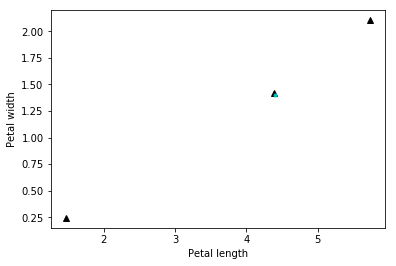

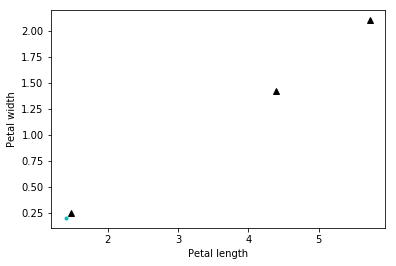

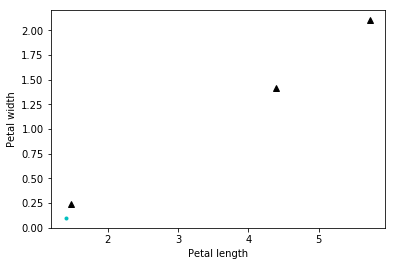

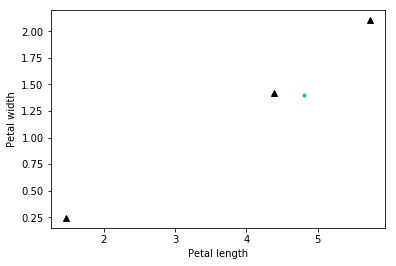

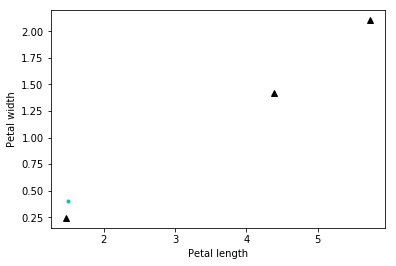

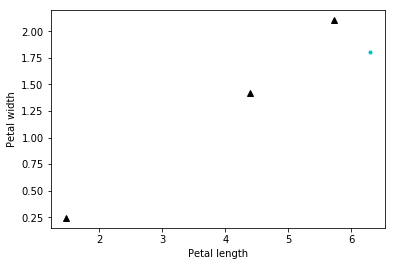

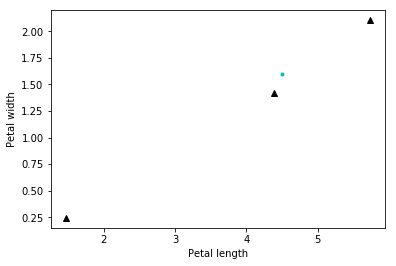

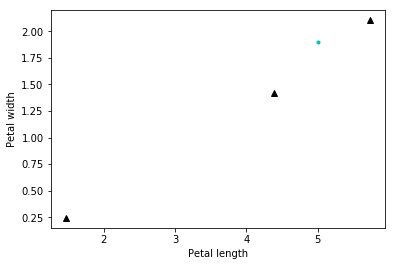

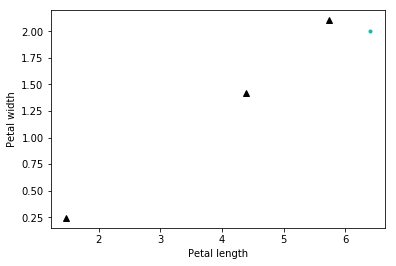

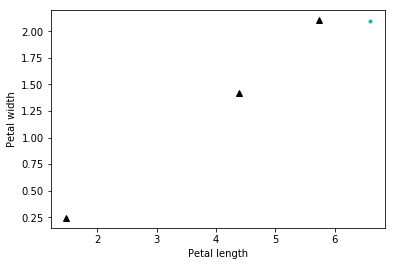

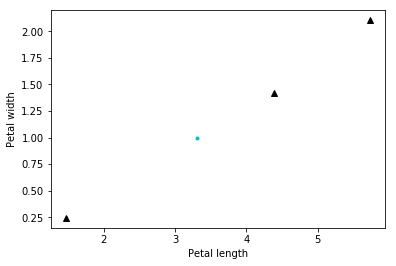

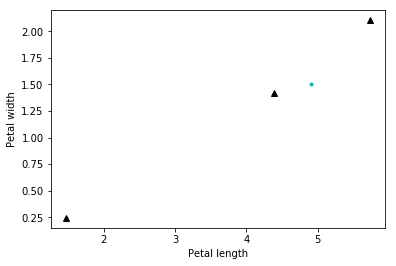

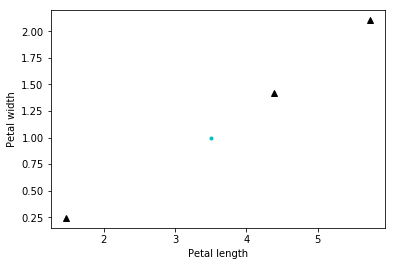

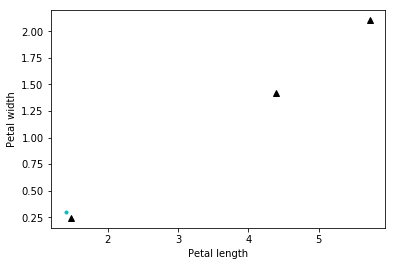

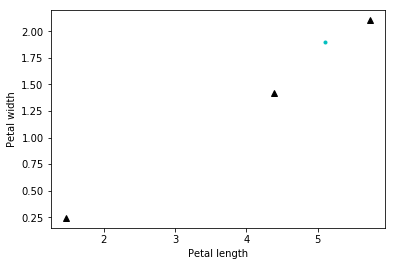

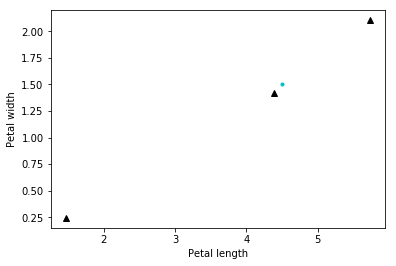

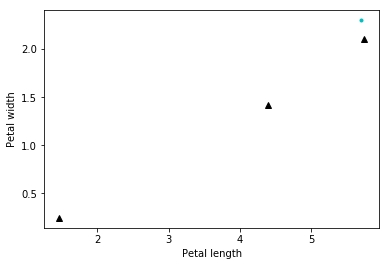

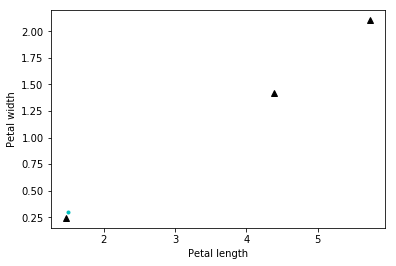

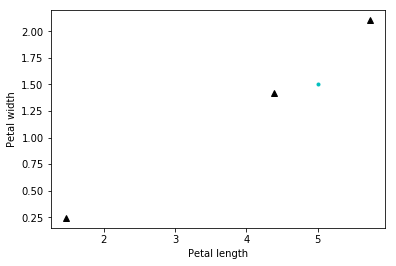

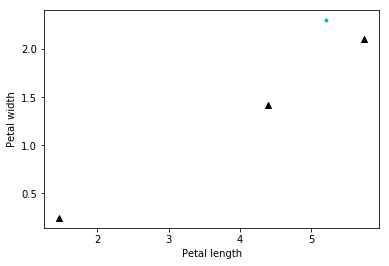

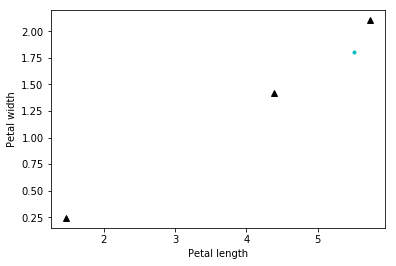

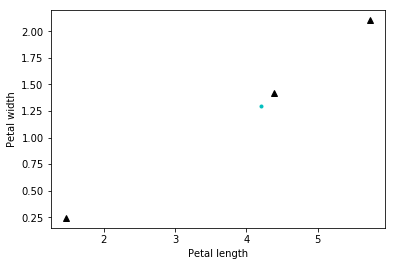

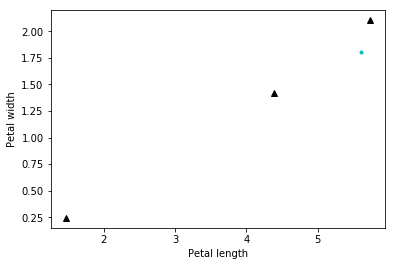

In [10]:
print("Test points are in blue and they are classified according to their nearest centroid")
predict(X_test, centroids)